In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from datetime import datetime
import math

In [2]:
docentes_file = '../data/docentes_periodo.csv'
teachers_by_period = pd.read_csv(docentes_file, delimiter = ';', encoding = "ISO-8859-1")

In [3]:
display(teachers_by_period.head())

,PERIODO,COD_MAT,COD_DOCENTE
0,201210,11303,1329
1,201210,11304,3111
2,201210,11305,622
3,201210,11312,1329
4,201210,11313,1329


In [4]:
display(teachers_by_period.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 3 columns):
PERIODO        32537 non-null int64
COD_MAT        32537 non-null int64
COD_DOCENTE    32537 non-null int64
dtypes: int64(3)
memory usage: 762.7 KB


None

In [14]:
teachers_by_period['PERIODO'] = teachers_by_period['PERIODO'].astype(str)
teachers_by_period['COD_MAT'] = teachers_by_period['COD_MAT'].astype(str)
teachers_by_period['COD_DOCENTE'] = teachers_by_period['COD_DOCENTE'].astype(str)
display(teachers_by_period.describe())

,PERIODO,COD_MAT,COD_DOCENTE
count,32537,32537,32537
unique,37,2275,2220
top,201620,77224,2442
freq,1986,264,158


In [91]:
periodos = pd.DataFrame(teachers_by_period['PERIODO'].value_counts()).reset_index()
periodos.columns = ['periodo', 'count']
periodos = periodos.sort_values('periodo')
periodos.head()

,periodo,count
16,201210,1407
29,201211,11
15,201220,1503
24,201221,23
14,201310,1564


In [49]:
teachers_by_period['corte'] = [i[4:] for i in teachers_by_period['PERIODO']]
teachers_by_period['year'] = [i[0:4] for i in teachers_by_period['PERIODO']]

In [50]:
teachers_by_period.head()

,PERIODO,COD_MAT,COD_DOCENTE,corte,year
0,201210,11303,1329,10,2012
1,201210,11304,3111,10,2012
2,201210,11305,622,10,2012
3,201210,11312,1329,10,2012
4,201210,11313,1329,10,2012


Text(0.5, 1.0, 'Bar plot')

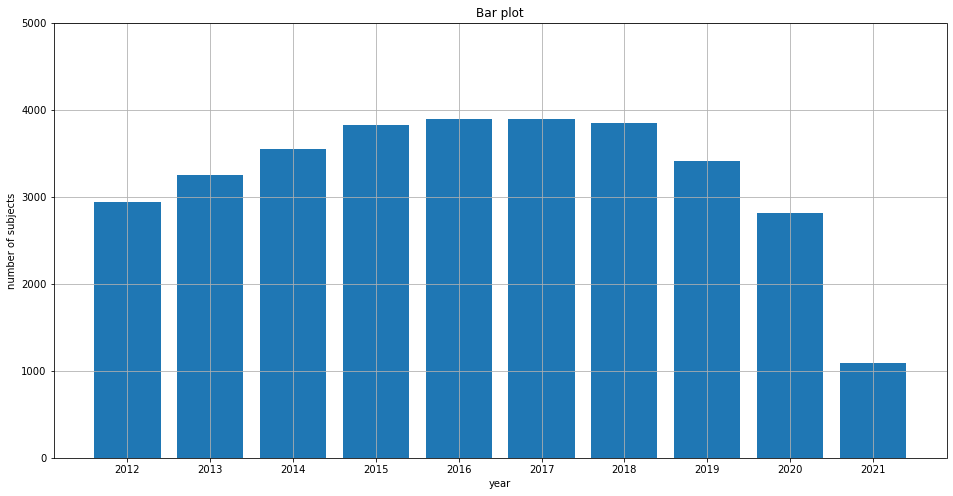

In [68]:
groupued_by_year = pd.DataFrame(teachers_by_period.groupby('year')['COD_DOCENTE'].count()).reset_index()
groupued_by_year.columns = ['year', 'count']

fig, ax = plt.subplots(figsize = (16,8))
plt.bar(groupued_by_year['year'], groupued_by_year['count'])
plt.ylim((0,5000))
ax.grid(True)
ax.set_xlabel('year')
ax.set_ylabel('number of subjects')
ax.set_title('Bar plot')

Text(0.5, 1.0, 'Bar plot')

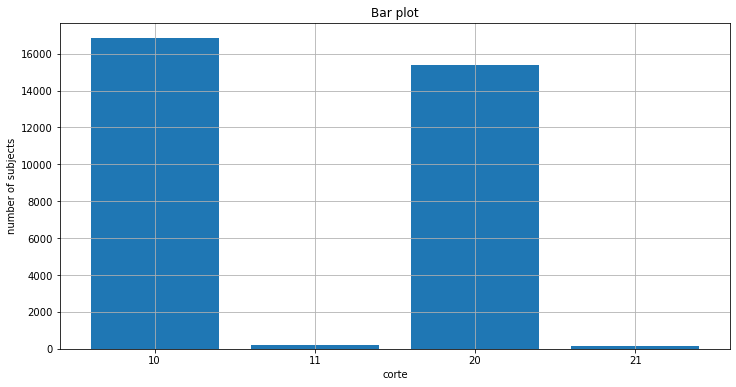

In [71]:
groupued_by_corte = pd.DataFrame(teachers_by_period.groupby('corte')['COD_DOCENTE'].count()).reset_index()
groupued_by_corte.columns = ['corte', 'count']

fig, ax = plt.subplots(figsize = (12,6))
plt.bar(groupued_by_corte['corte'], groupued_by_corte['count'])
#plt.ylim((0,5000))
ax.grid(True)
ax.set_xlabel('corte')
ax.set_ylabel('number of subjects')
ax.set_title('Bar plot')

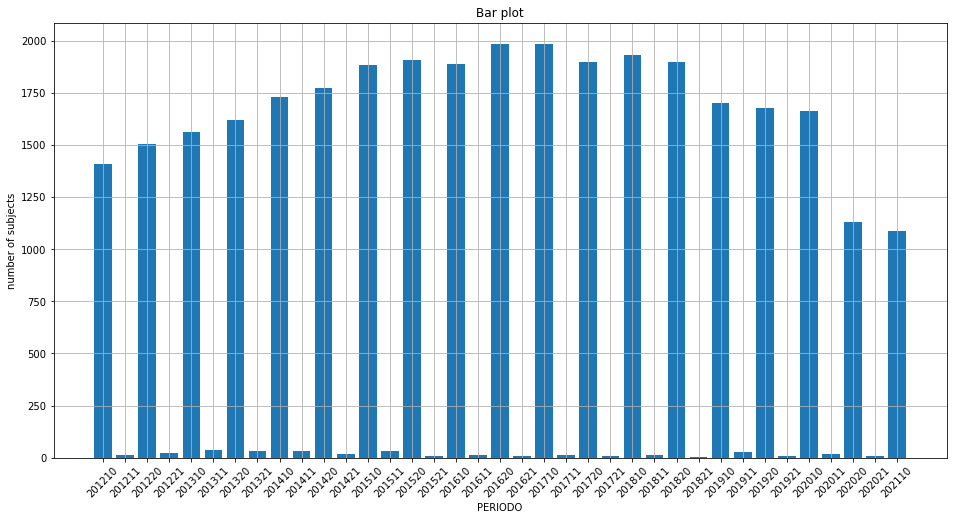

In [118]:
groupued_by_PERIODO = pd.DataFrame(teachers_by_period.groupby('PERIODO')['COD_DOCENTE'].count()).reset_index()
groupued_by_PERIODO.columns = ['PERIODO', 'count']

fig, ax = plt.subplots(figsize = (16,8))
plt.bar(groupued_by_PERIODO['PERIODO'], groupued_by_PERIODO['count'])
#plt.ylim((0,5000))
ax.grid(True)
ax.set_xlabel('PERIODO')
ax.set_ylabel('number of subjects')
ax.set_title('Bar plot')
plt.xticks(rotation=45)
pass

In [83]:
groupued_by_teacher = pd.DataFrame(teachers_by_period.groupby(['COD_DOCENTE', 'COD_MAT'])['PERIODO'].count()).reset_index()
groupued_by_teacher.columns = ['teacher', 'COD_MAT', 'count']
groupued_by_teacher.sort_values('count', ascending = False, inplace = True)
groupued_by_teacher.head(5)

,teacher,COD_MAT,count
5992,398,66443,25
2404,3010,66443,23
1854,2594,66443,23
1059,2113,66441,22
4293,352,66441,22


In [86]:
groupued_by_teacher['teacher'].value_counts().head()

0       38
3080    38
3195    30
1329    30
3438    29
Name: teacher, dtype: int64

In [89]:
groupued_by_teacher[groupued_by_teacher['teacher']=='2442']

,teacher,COD_MAT,count
1526,2442,66230,19
1534,2442,66257,18
1527,2442,66236,17
1524,2442,66219,17
1523,2442,66217,17
1522,2442,66203,15
1535,2442,66259,10
1532,2442,66252,10
1531,2442,66250,10
1529,2442,66246,10


In [117]:
groupued_by_teacher = pd.DataFrame(teachers_by_period.groupby('COD_DOCENTE')['PERIODO'].count()).reset_index()
groupued_by_teacher.columns = ['teacher', 'count']
groupued_by_teacher.sort_values('count', ascending = False, inplace = True)
groupued_by_teacher.head(5)

,teacher,count
257,2442,158
117,1732,108
134,1819,98
2204,857,95
267,2474,94


In [92]:
teachers_by_period['subjects_by_teacher'] = np.nan
teachers_by_period.head()

,PERIODO,COD_MAT,COD_DOCENTE,corte,year,subjects_by_teacher
0,201210,11303,1329,10,2012,NaN
1,201210,11304,3111,10,2012,NaN
2,201210,11305,622,10,2012,NaN
3,201210,11312,1329,10,2012,NaN
4,201210,11313,1329,10,2012,NaN


In [94]:
for idx in range(0, len(teachers_by_period)):
    
    teacher_id = teachers_by_period.loc[idx, 'COD_DOCENTE']
    
    try:
        subjects = groupued_by_teacher[(groupued_by_teacher['teacher'] == teacher_id)]['count'].values[0]
        
    except:
        subjects = np.nan
        
    teachers_by_period.loc[idx, 'subjects_by_teacher'] = subjects

In [106]:
teachers_by_period.head()

,PERIODO,COD_MAT,COD_DOCENTE,corte,year,subjects_by_teacher
0,201210,11303,1329,10,2012,79.0
1,201210,11304,3111,10,2012,4.0
2,201210,11305,622,10,2012,29.0
3,201210,11312,1329,10,2012,79.0
4,201210,11313,1329,10,2012,79.0
